# Clustering techniques and circle fitting to detect cones

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.optimize import least_squares
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

## Sample data & robot characteristics

In [3]:
# --- Sample data (Gazebo simulation) ---

# list of angles
angles = np.arange(180)
# ranges at each angle
ranges = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2824296,0.26145798,0.2573267,0.26639497,0.24198154,0.2563263,0.2492486,0.2490494,0.23836158,0.24237356,0.23530357,0.23706202,0.25634965,0.24145673,0.24730304,0.22856069,0.2428339,0.27549574,0.27851492,0.2812332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6338318,0.6245537,0.62674254,0.60722196,0.61645097,0.61293894,0.6154953,0.6283516,1.0512443,1.0353955,1.0124562,1.015074,1.0281942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.056657,1.0319761,1.0562071,1.0670962,1.0690211,0.0,0.6703088,0.6614847,0.62876225,0.6578732,0.6321875,0.63878906,0.6601635,0.69316703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.30538955,0.28617328,0.26936582,0.29005092,0.28203058,0.27593866,0.2672876,0.2766986,0.27477232,0.27204654,0.25706476,0.26719218,0.2835501,0.29585886,0.2891943,0.28550506,0.29798606,0.31336707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
# cartesian coordinates
scan = [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.26475261566940417, 0.4076832769475833], [0.2492846692155993, 0.39893886370630016], [0.23522982914176874, 0.3914881782774637], [0.231110692024231, 0.4002954607583713], [0.21966359591233572, 0.3962836171204983], [0.2092305707249133, 0.39350547172186184], [0.20564606471986455, 0.40360312703499823], [0.20000542998465776, 0.4100719014342627], [0.19803622419613245, 0.42469005330018855], [0.18035154712891968, 0.4050762070820729], [0.17617148528865026, 0.41503401040795124], [0.17943245064414107, 0.444110899665582], [0.0, 0.0], [0.0, 0.0], [0.3078515717607658, 0.8940658834172148], [0.28543014893583174, 0.87846367039329], [0.2656562247287768, 0.8689223582707308], [0.2463025387154562, 0.8589590310709667], [0.2318189832808474, 0.8651602237630827], [0.2209191291019867, 0.8860582308555921], [0.3235144423100644, 1.4012950018485377], [0.29663777030895144, 1.395570985804046], [0.2710548307989433, 1.394456218334856], [0.2475302875721014, 1.4038140197124016], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.12783691391267138, 1.461182612245432], [-0.15253341890815308, 1.4512585389407735], [-0.1761175806212311, 1.4343625886360525], [-0.20554277593658746, 1.462512844553997], [-0.15088578912611786, 0.9526553796379661], [-0.16202508815910885, 0.9188899367987109], [-0.1813430030344403, 0.9329288745289459], [-0.19513668136049658, 0.9180459065922952], [-0.21232679261862922, 0.9196883796917275], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.16470934261874542, 0.4783506644881945], [-0.1703502587380393, 0.46803348928101546], [-0.17877689905767694, 0.4657297447550218], [-0.18677259784157024, 0.46227840149607935], [-0.19002983687734906, 0.44768224078460456], [-0.19577833335615205, 0.4397253362515959], [-0.20621935052865603, 0.44223882435168954], [-0.21217104599471853, 0.43501511067486887], [-0.22599672446271898, 0.44354354564028525], [-0.23522234433245348, 0.4423888882268529], [-0.2502497997402609, 0.45146258947854107], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0]]
(x,y) = tuple([list(tup) for tup in zip(*scan)])

# --- Turtlebot3 specifications ---

robot_length = 0.138 # m
robot_width = 0.178 # m
robot_height = 0.192 # m
robot_max_speed = 0.22 # m/s
robot_weight = 1 # kg
robot_min_range = 0.12 # m
robot_max_range = 3.5 # m
# robot_max_angular_speed = 0.2 # rad/s

# --- Utility functions ---

def polar2cartesian(array):
    angles = np.deg2rad(np.arange(0,180))
    x = array * np.cos(angles)
    y = array * np.sin(angles)

    return (x,y) #(list(map(list, zip(x, y))))

def cartesian2polar(array):
    x, y = np.array(array).T
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return list(zip(r, np.rad2deg(theta)))

## RANSAC

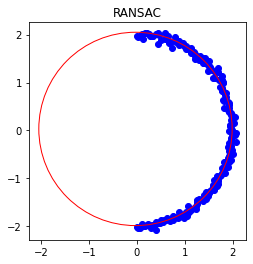

In [41]:
def data_generator():
	x_data = []
	y_data = []

	a = 2
	b = 3
	r = 100

	for i in np.arange(a - r, a + r, 1):
		x = i
		y = 0
		y1, y2 = circle_func(a, b, r, x)
		if np.random.randn() > 0:
			y += y1 + np.random.randn()*5
		else:
			y += y2 + np.random.randn()*5
		x_data.append(x)
		y_data.append(y)

	return x_data, y_data

def circle_func(a, b, r, x):
	return (np.sqrt(r**2-(x-a)**2) + b, -np.sqrt(r**2-(x-a)**2) + b)

class RANSAC:
	def __init__(self, x_data, y_data, n):
		self.x_data = x_data
		self.y_data = y_data
		self.n = n
		self.d_min = 99999
		self.best_model = None

	def random_sampling(self):
		sample = []
		save_ran = []
		count = 0

		# get three points from data
		while True:
			ran = np.random.randint(len(self.x_data))

			if ran not in save_ran:
				sample.append((self.x_data[ran], self.y_data[ran]))
				save_ran.append(ran)
				count += 1

				if count == 3:
					break

		return sample

	def make_model(self, sample):
		# calculate A, B, C value from three points by using matrix
	
		pt1 = sample[0]
		pt2 = sample[1]
		pt3 = sample[2]

		A = np.array([[pt2[0] - pt1[0], pt2[1] - pt1[1]], [pt3[0] - pt2[0], pt3[1] - pt2[1]]]) 
		B = np.array([[pt2[0]**2 - pt1[0]**2 + pt2[1]**2 - pt1[1]**2], [pt3[0]**2 - pt2[0]**2 + pt3[1]**2 - pt2[1]**2]])		
		inv_A = inv(A)

		c_x, c_y = np.dot(inv_A, B) / 2
		c_x, c_y = c_x[0], c_y[0]
		r = np.sqrt((c_x - pt1[0])**2 + (c_y - pt1[1])**2)

		return c_x, c_y, r

	def eval_model(self, model):
		d = 0
		c_x, c_y, r = model

		for i in range(len(self.x_data)):
			dis = np.sqrt((self.x_data[i]-c_x)**2 + (self.y_data[i]-c_y)**2)

			if dis >= r:
				d += dis - r
			else:
				d += r - dis
		
		return d

	def execute_ransac(self):
		# find best model
		for i in range(self.n):
			model = self.make_model(self.random_sampling())
			d_temp = self.eval_model(model)
			
			if self.d_min > d_temp:
				self.best_model = model
				self.d_min = d_temp


if __name__ == '__main__':
	# making data
	x_data, y_data = (x, y) #data_generator()

	# making ransac class
	# n: how many times try sampling
	ransac = RANSAC(x_data, y_data, 50)
	
	# executing ransac algorithm
	ransac.execute_ransac()
	
	# getting best model from ransac
	a, b, r = ransac.best_model[0], ransac.best_model[1], ransac.best_model[2]

	# show result
	plt.scatter(x, y, c='blue', marker='o', label='data')
	circle = plt.Circle((a, b), radius=r, color='r', fc='y', fill=False)
	plt.gca().add_patch(circle)
	plt.axis('scaled')
	plt.title("RANSAC")
	plt.show()
	# plt.tight_layout()
	

Ransac is based on the principle of randomly selecting a subset of data points that are most likely to belong to the model <br> and then refining the model parameters from these points. <br> Ransac is more robust to outliers than the least squares method but is more computationally intensive.

## Least Squares Method

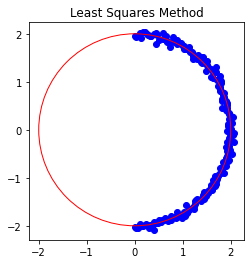

Circle center: (-0.001, 0.009)
Circle radius: 1.999


In [42]:
# Defining the function to be minimized
def residual(params, x, y):
    xc, yc, r = params
    return (x - xc)**2 + (y - yc)**2 - r**2

# Generating some noisy data
theta = np.linspace(0, 2*np.pi, 100)
xc, yc, r = 1.5, 1.5, 1.0
# x = xc + r * np.cos(theta) + 0.1 * np.random.randn(len(theta))
# y = yc + r * np.sin(theta) + 0.1 * np.random.randn(len(theta))

# Using the least squares method to fit a circle to the data
initial_guess = [1.0, 1.0, 1.0]  # initial guess for the circle parameters
params = least_squares(residual, initial_guess, args=(x, y)).x

# Extracting the circle parameters from the optimized solution
xc, yc, r = params

# Plotting the points and circle
plt.scatter(x_data, y_data, c='blue', marker='o', label='data')
circle2 = plt.Circle((xc, yc), radius=r, color='r', fc='y', fill=False)
plt.gca().add_patch(circle2)
plt.axis('scaled')
plt.title("Least Squares Method")
plt.show()

# Printing the results
print(f"Circle center: ({xc:.3f}, {yc:.3f})")
print(f"Circle radius: {r:.3f}")

## DBSCAN

DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

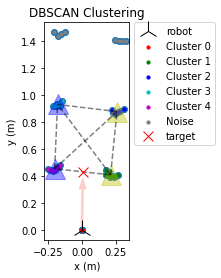

In [4]:
# Plotting the scan and robot 
plt.scatter(x,y, marker='o') # blue points for the scanned points
# black cross for the robot
plt.plot(0, 0, 'k2', markersize=20, label='robot')

# Clusterizing the scan
dbscan = DBSCAN(eps=0.05, min_samples=5)    # Initialize DBSCAN object with specified hyperparameters
dbscan.fit(np.array(scan))                  # Fit the model to the data
labels = dbscan.labels_                     # Extract the labels and number of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0) # Number of clusters in labels, ignoring noise if present

# Extract the center out of each cluster
centers = []
X = np.array(scan)

for i in range(n_clusters):
    center = np.mean(X[labels == i], axis=0)
    # check if center is in robot's range
    if np.sqrt(center[0]**2 + center[1]**2) > robot_min_range:
        centers.append(center)
        cone_marker = "y^"
        if center[0] < 0:
            cone_marker = "b^"
        plt.plot(center[0], center[1], cone_marker, alpha=0.4, markersize=20) # Plot the center of each cluster (possible cone)


# Sort the centers by distance to the robot
centers.sort(key=lambda x: np.sqrt(x[0]**2 + x[1]**2))

# Plot the clusters
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i in range(n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=10, c=colors[i], label=f'Cluster {i}')

# Plot the noise
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], s=10, c='gray', label='Noise')

# Plot line between cone pairs
for i in range(len(centers)):
    for j in range(i+1, len(centers)):
        plt.plot([centers[i][0], centers[j][0]], [centers[i][1], centers[j][1]], 'k--', alpha=0.5)

# Plot a point at the center of the two nearest cones
if len(centers) > 1:
    (target_x, target_y) = ((centers[0][0] + centers[1][0])/2, (centers[0][1] + centers[1][1])/2)
    target_angle = np.rad2deg(np.arctan(target_x / target_y))
    plt.arrow(x=0, y=0, dx=target_x, dy=target_y*0.7, width=.02, facecolor='red', edgecolor='none', alpha=0.2)
    plt.plot(target_x, target_y, 'rx', markersize=10, label='target')

plt.title('DBSCAN Clustering')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon=True)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis('scaled')
plt.savefig('cone_clustering2.png', dpi=300, bbox_inches='tight')
plt.show()

In [269]:
def find_target_angle(scan, cluster_th=0.05, min_samples=5) -> float:
    """
    Returns the angle of steering to the midpoint of the two nearest cones.
    """
    # Clusterizing the scan
    dbscan = DBSCAN(eps=cluster_th, min_samples=min_samples)    
    dbscan.fit(np.array(scan))    # Fit the model to the data
    labels = dbscan.labels_       # Extract the labels and number of clusters
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0) # Number of clusters in labels, ignoring noise if present

    # Extracting the center out of each cluster
    centers = []
    for i in range(n_clusters):
        center = np.mean(X[labels == i], axis=0)
        # check if center is in robot's range
        if np.sqrt(center[0]**2 + center[1]**2) > robot_min_range:
            centers.append(center)

    # Sorting the centers by distance to the robot
    centers.sort(key=lambda x: np.sqrt(x[0]**2 + x[1]**2))

    # Calculating the target position and angle
    (target_x, target_y) = ((centers[0][0] + centers[1][0])/2, (centers[0][1] + centers[1][1])/2)
    target_angle = np.rad2deg(np.arctan(target_x / target_y))

    return target_angle

In [1]:
find_target_angle(scan)

NameError: name 'find_target_angle' is not defined

# Clustering and circle-fitting combined ?

In [272]:
# Combination of DBSCAN and RANSAC 